<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity2023/blob/main/0701_dls_ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
%%bash
[[ ! -d utils ]] && mkdir utils && cd utils
[[ ! -f disjointset.py ]] && \
curl -O https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity2023/main/utils/graphs.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1465  100  1465    0     0   8003      0 --:--:-- --:--:-- --:--:--  8049


In [27]:
%%file 1.g
1 4
-
-
2 6 17
7
2
10
0 8
4
8
-
8 14
16
9 17
15
11 17
15 17
13

Overwriting 1.g


In [3]:
with open('1.g') as f:
    G = []
    for line in f:
        if line.startswith('-'):
            G.append([])
            continue
        G.append([int(v) for v in line.split()])

for u, neig in enumerate(G):
    print(u, neig)

0 [1, 4]
1 []
2 []
3 [2, 6, 17]
4 [7]
5 [2]
6 [10]
7 [0, 8]
8 [4]
9 [8]
10 []
11 [8, 14]
12 [16]
13 [9, 17]
14 [15]
15 [11, 17]
16 [15, 17]
17 [13]


In [4]:
from utils import graphs

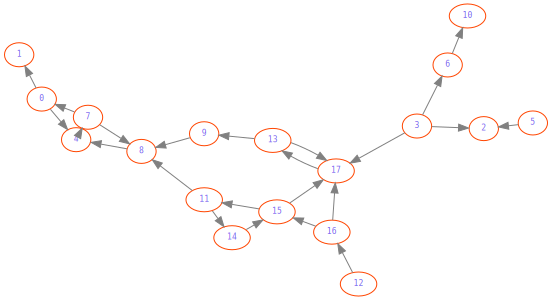

In [28]:
graphs.show(G, directed=True)

## Depth Limit Search

In [6]:
def dls(G, s, t, L):
    n = len(G)
    visited = [False]*n
    path = [-1]*n

    def _dls(u, l):
        if l == 0: return
        visited[u] = True
        if u == t:
            return
        for v in G[u]:
            if not visited[v]:
                path[v] = u
                _dls(v, l-1)

    _dls(s, L)
    return path


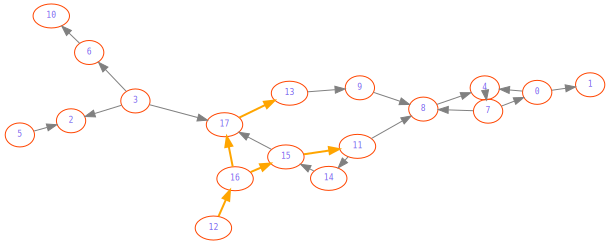

In [20]:
path = dls(G, s=12, t=1, L=3)
graphs.show(G, directed=True, path=path)

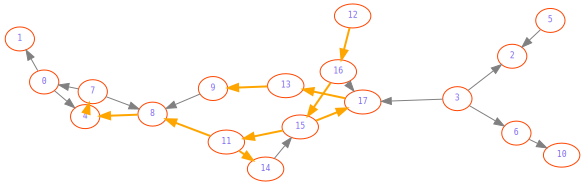

In [21]:
path = dls(G, s=12, t=1, L=6)
graphs.show(G, directed=True, path=path)

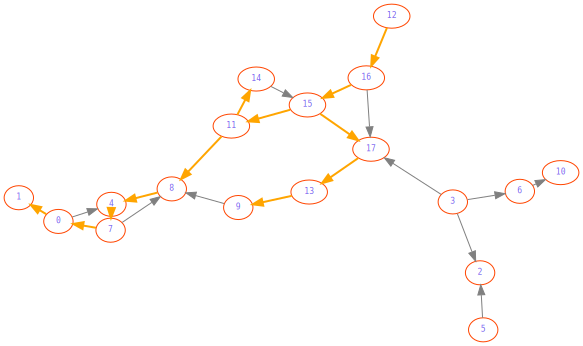

In [22]:
path = dls(G, s=12, t=1, L=10)
graphs.show(G, directed=True, path=path)

## Iterative Depth Search (IDS)

In [24]:
def ids(G, s, t):
    for L in range(1, len(G)):
        path = dls(G, s, t, L)
        if path[t] != -1:
            return path, L
    return None, -1

[7, 0, -1, -1, 8, -1, -1, 4, 11, 13, -1, 15, -1, 17, 11, 16, 12, 15] 8


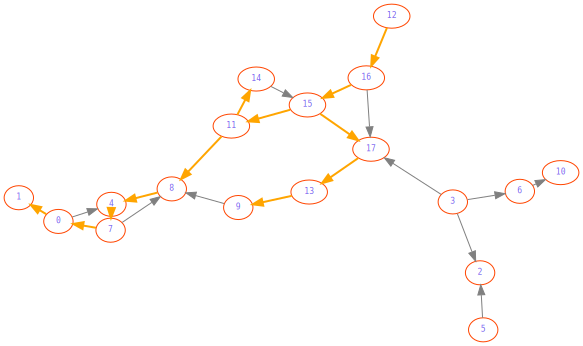

In [25]:
path, L = ids(G, 12, 1)
print(path, L)
graphs.show(G, directed=True, path=path)

In [31]:
s, t = 12, 5
path, L = ids(G, s, t)
print(path, L)
if not path:
    print(f"No path from {s} to {t}")
else:
    graphs.show(G, directed=True, path=path)

None -1
No path from 12 to 5
